In [2]:
import numpy as np
import pandas as pd
import glob
import os
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import holidays
from datetime import date

In [3]:
df = pd.read_csv('D:/Summer Practicum/1_Data/training_airlines.csv',low_memory=False)
df.columns = df.columns.str.replace(' ', '')

In [4]:
df['FlightDate']=pd.to_datetime(df['FlightDate'])
df['FlightDate']

0         2022-04-20
1         2022-12-25
2         2022-11-01
3         2022-09-27
4         2022-10-13
             ...    
3444859   2022-06-30
3444860   2022-12-23
3444861   2022-08-01
3444862   2023-02-28
3444863   2022-10-13
Name: FlightDate, Length: 3444864, dtype: datetime64[ns]

In [5]:
# Example for US holidays
us_holidays = holidays.US(years=range(df['FlightDate'].min().year, df['FlightDate'].max().year + 1))
# Convert holidays to a set of dates for efficient lookup
holiday_dates = {date for date, name in us_holidays.items()}

df['is_holiday'] = df['FlightDate'].dt.date.isin(holiday_dates)

<Axes: xlabel='Operating_Airline', ylabel='ArrDelay'>

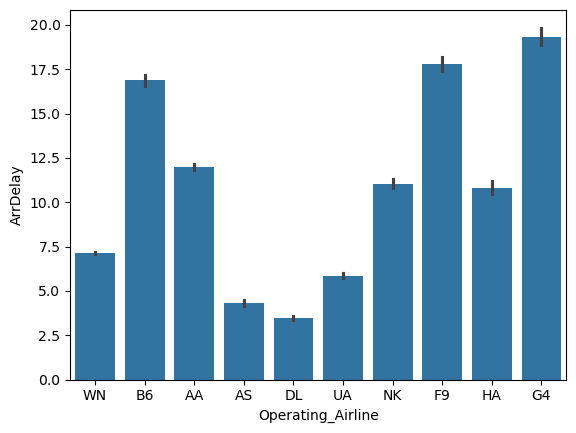

In [14]:
sns.barplot(x='Operating_Airline',y='ArrDelay',data=df)

<Axes: xlabel='Operating_Airline', ylabel='ArrDelayMinutes'>

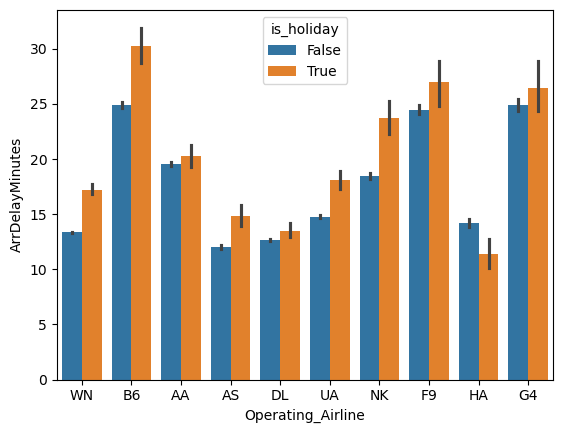

In [6]:
sns.barplot(x='Operating_Airline',y='ArrDelayMinutes', hue='is_holiday',data=df)

<Axes: xlabel='Operating_Airline', ylabel='DepDelay'>

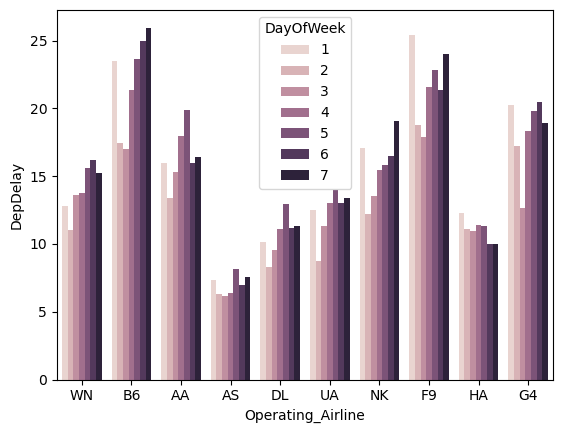

In [24]:
sns.barplot(x='Operating_Airline',y='DepDelay', hue='DayOfWeek',data=df,errorbar=None)

<Axes: xlabel='Operating_Airline', ylabel='Total_Taxi'>

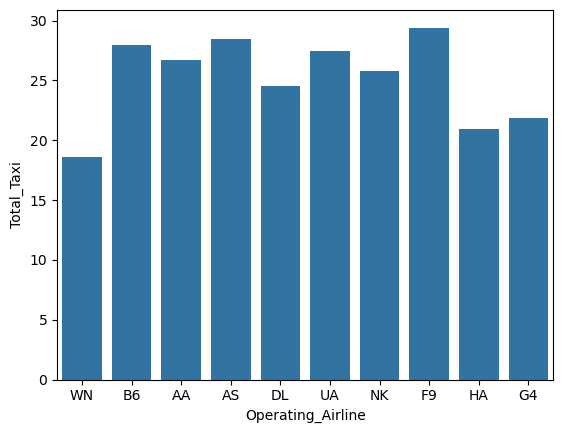

In [23]:
'''df['Total_Taxi'] = df['TaxiIn'] + df['TaxiOut']
top_10_airports=['ATL','DFW','DEN','ORD','LAX','CLT','MCO','LAS','PHX','MIA']
df_top_10 = df[((df['Origin'].isin(top_10_airports)) | (df['Dest'].isin(top_10_airports)))]'''

sns.barplot(x='Operating_Airline',y='Total_Taxi',data=df,errorbar=None)